In [6]:
import numpy as np
import os
from natsort import natsorted
import matplotlib.pyplot as plt

root_dir    = os.path.join('..')
dataset_dir = os.path.join(root_dir, 'data', 'bead')  # bead dataset

sample_names = [sample_name for sample_name in os.listdir(dataset_dir) if 'bead' in sample_name]
print(f'samples: {sample_names}')
print(f'total samples: {len(sample_names)}')

samples: ['bead-1', 'bead-3', 'bead-2']
total samples: 3


In [8]:
# check bead 3D sample bead-1
sample_index = 0
sample_name  = sample_names[sample_index]

phase_img_dir = os.path.join(dataset_dir, sample_name, 'phase')
fl_img_dir    = os.path.join(dataset_dir, sample_name, 'fl')

phase_z_slices = natsorted(os.listdir(phase_img_dir))
fl_z_slices   = natsorted(os.listdir(fl_img_dir))

print(f'phase slices: {len(phase_z_slices)}, fl slcies: {len(fl_z_slices)}')

print(f'first 10 slices: {phase_z_slices[:10]}')
print(f'first 10 slices: {fl_z_slices[:10]}')

phase slices: 246, fl slcies: 246
first 10 slices: ['bead-1_z2.npy', 'bead-1_z3.npy', 'bead-1_z4.npy', 'bead-1_z5.npy', 'bead-1_z6.npy', 'bead-1_z7.npy', 'bead-1_z8.npy', 'bead-1_z9.npy', 'bead-1_z10.npy', 'bead-1_z11.npy']
first 10 slices: ['bead-1_z2.npy', 'bead-1_z3.npy', 'bead-1_z4.npy', 'bead-1_z5.npy', 'bead-1_z6.npy', 'bead-1_z7.npy', 'bead-1_z8.npy', 'bead-1_z9.npy', 'bead-1_z10.npy', 'bead-1_z11.npy']


In [9]:
# check a training sample for multi-channel E-Unet
slice_index = len(phase_z_slices) // 2
phase_path  = os.path.join(phase_img_dir, f'{sample_name}_z{slice_index}.npy')
fl_path     = os.path.join(fl_img_dir,    f'{sample_name}_z{slice_index}.npy')

print(f'{phase_path}')
print(f'{fl_path}')

phase = np.load(phase_path)
fl    = np.load(fl_path)
print(f'phase shape: {phase.shape}')   # 3-channel phase input
print(f'fl shape: {fl.shape}')         # ground truth for the middle channel

../data/bead/bead-1/phase/bead-1_z123.npy
../data/bead/bead-1/fl/bead-1_z123.npy
phase shape: (128, 128, 3)
fl shape: (128, 128)


phase val range: (0.493896, 0.9813491)
phase val range: (0.004279219, 0.35918695)


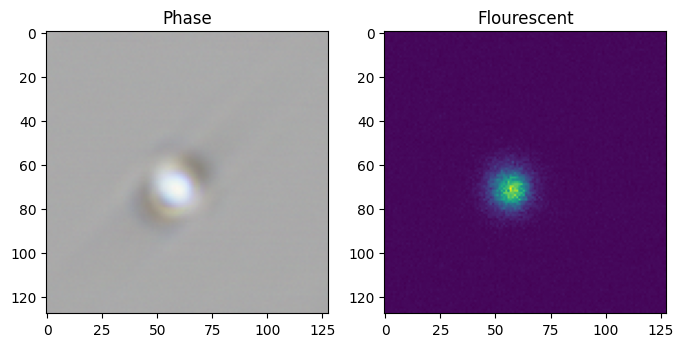

In [11]:
# visualize a phase input and the corresponding flourescent ground truth
fig  = plt.figure(figsize = (8, 4))
ax   = fig.add_subplot(1, 2, 1)
bx   = fig.add_subplot(1, 2, 2)
ax.imshow(phase)
ax.set_title('Phase')
bx.imshow(fl)
bx.set_title('Flourescent')
print(f'phase val range: {phase.min(), phase.max()}')
print(f'phase val range: {fl.min(),    fl.max()}')